In [1]:
# tips form https://waterprogramming.wordpress.com/2017/04/03/making-watershed-maps-in-python/

# Import necessary modules
import geopandas as gpd
    
from mpl_toolkits.basemap import Basemap
from matplotlib import pyplot as plt
 
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature    

In [2]:
#fig = plt.figure()
#fig.set_size_inches([17.05,8.15])
#ax = fig.add_subplot(111)
 
# plot basemap, rivers and countries
#m = basemap(llcrnrlat=19.5, urcrnrlat=26.0, llcrnrlon=99.6, urcrnr=107.5, resolution='h')
#m.arcgisimage(service='World_Shaded_Relief')
#m.drawrivers(color='dodgerblue',linewidth=1.0,zorder=1)
#m.drawcountries(color='k',linewidth=1.25)

NameError: name 'basemap' is not defined

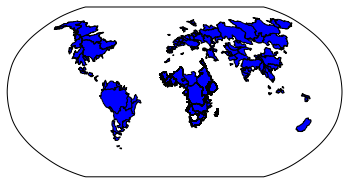

In [71]:
ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader('Major_Basins_of_the_World.dbf').geometries(),
                                ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature, facecolor='blue')
plt.show()

In [72]:
# Set filepath (fix path relative to yours)
In [2]: fp = "Major_Basins_of_the_World.dbf"

# Read file using gpd.read_file()
In [3]: data = gpd.read_file(fp)

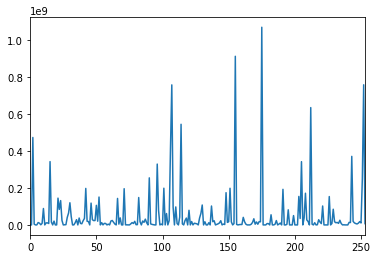

In [73]:
data['LAEA_ACRES'].plot()

In [74]:
data

,BASWC4_ID,ID,N,NAME,CONT,NN,FISH_,ACRES,SOURCETHM,NO_COUNTRI,Q3,CHECKED,LAEA_HA,LAEA_ACRES,LAEA_PRMTR,geometry
0,2,408,11,Indigirka,2,2011,0,0.002,geoff2.dbf,0,None,-1,0.000000e+00,0.0,0.0,"POLYGON ((139.68730 63.93320, 139.82028 64.030..."
1,3,436,14,Kolyma,2,2014,29,0.003,geoff2.dbf,0,None,-1,0.000000e+00,0.0,0.0,"POLYGON ((153.32126 70.87090, 153.33440 70.873..."
2,4,38,36,Yenisey,2,2036,42,0.007,final_draft22.db,0,International catchments,-1,1.916399e+08,473542164.8,10368035.7,"POLYGON ((84.03548 62.48704, 84.03149 62.49136..."
3,5,148,78,Tana,0,0,0,0.000,final_draft22.db,0,International catchments,-1,1.698563e+06,4197148.9,750506.4,"POLYGON ((25.51510 68.64600, 25.40198 68.62086..."
4,6,104,11,Mackenzie,5,5011,53,0.006,final_draft22.db,0,None,5,0.000000e+00,0.0,0.0,"POLYGON ((-136.92070 68.20810, -136.88443 68.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,251,0,0,Void,0,0,0,0.000,None,0,International catchments,5,7.292745e+06,18020373.2,1867904.1,"POLYGON ((33.95228 -6.69550, 33.95243 -6.70446..."
250,279,0,0,Mangoky,0,0,0,0.000,None,0,None,5,4.310280e+06,10650702.0,2127189.5,"POLYGON ((46.82328 -21.32725, 46.82447 -21.336..."
251,1,39,16,Lena,2,2016,43,0.009,final_draft22.db,0,None,-1,1.016640e+08,251211777.3,13423660.9,"POLYGON ((102.72000 65.76000, 102.85008 65.906..."
252,10,37,24,Ob,2,2024,43,0.010,final_draft22.db,0,International catchments,-1,3.070918e+08,758823924.1,13761196.3,"POLYGON ((84.03548 62.48704, 84.06540 62.45478..."


In [81]:
data['LAEA_HA'].sort_values()

0      0.000000e+00
157    0.000000e+00
75     0.000000e+00
70     0.000000e+00
60     0.000000e+00
           ...     
212    2.571184e+08
107    3.068768e+08
252    3.070918e+08
155    3.695271e+08
175    4.331847e+08
Name: LAEA_HA, Length: 254, dtype: float64

In [62]:
data[data['Q3'] == 'International catchments'].to_file('test_new_shape.shp')

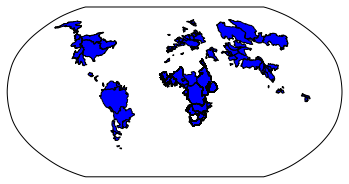

In [63]:
ax = plt.axes(projection=ccrs.Robinson())
shape_feature = ShapelyFeature(Reader('test_new_shape.dbf').geometries(),
                                ccrs.PlateCarree(), edgecolor='black')
ax.add_feature(shape_feature, facecolor='blue')
plt.show()

In [69]:
# Set filepath (fix path relative to yours)

fp = "test_new_shape.dbf"

# Read file using gpd.read_file()
data_international = gpd.read_file(fp)


In [82]:
data_international.area

0      315.747419
1        3.917628
2      155.983266
3       10.890038
4        8.244295
          ...    
164      1.693755
165      3.165517
166      5.954211
167    454.217818
168      3.083262
Length: 169, dtype: float64